# Detecting Money Laundering Patterns Across Global Financial Transactions- ETL process and statistical analysis.

## Objectives

This project will explore a large dataset of 10,000 records, containing information on international  financial transactions. The dataset includes categorical and numerical information as it relates to each financial transaction including country of origin, the legality of the transaction, transaction amount, industry, number of shell companies, tax haven of country and risk rating. 

The objective is to determine what variable or group of variables within the dataset will determine if the transaction is illegal. To do this, we will:

- Carry out a complete ETL (Extract, Transform, Load) process to clean and prepare the data.

 - Run statistical tests to evaluate the four different hypothesis.

 - Use these insights to suggest money laundering risk reduction strategies.



0. **Ethics and Data Privacy**



---

1. **Import Required Libraries**

I will begin by importing the necessary Python libraries for data handling and exploration.

In [2]:
import pandas as pd
import numpy as np
import os

# Step 0. Move up one directory level to where the dataset file is located, enabling pandas to find and load the CSV successfully
print(os.getcwd())

/Users/nataliewaugh/Documents/DataCode/Detecting_Money_Laundering_Patterns-/jupyter_notebooks


2. **Load the Dataset**

I will load the CSV file named Money_Laundering_Dataset.csv from the local directory.

In [3]:
#Step 1. Load the dataset
data = pd.read_csv('/Users/nataliewaugh/Documents/DataCode/Detecting_Money_Laundering_Patterns-/data/Money_ Laundering_Dataset.csv')

#Step 2. show the first few rows of the dataset
data.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg


In [4]:
# Step 3. Display summary of dataset structure, including column names, non-null counts, and data types.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  object 
 1   Country                      10000 non-null  object 
 2   Amount (USD)                 10000 non-null  float64
 3   Transaction Type             10000 non-null  object 
 4   Date of Transaction          10000 non-null  object 
 5   Person Involved              10000 non-null  object 
 6   Industry                     10000 non-null  object 
 7   Destination Country          10000 non-null  object 
 8   Reported by Authority        10000 non-null  bool   
 9   Source of Money              10000 non-null  object 
 10  Money Laundering Risk Score  10000 non-null  int64  
 11  Shell Companies Involved     10000 non-null  int64  
 12  Financial Institution        10000 non-null  object 
 13  Tax Haven Country

3. **Clean the Dataset**

I will check for irregularities across the dataset which may hinder further analysis i.e spelling mistakes and duplication. Moneytary values will be brought down to 0 decimal places 

In [5]:
# Step 4. Drop columns that are not needed for analysis
data.drop(columns=['Transaction ID'], inplace=True)

In [6]:
# Step 5. Check for duplicate values in 'Person Involved' column
print(data['Person Involved'].duplicated().sum())

3680


In [7]:
print(data['Person Involved'].unique())

['Person_1101' 'Person_7484' 'Person_3655' ... 'Person_6348' 'Person_4171'
 'Person_3267']


Initially, I considered removing the `'Person Involved'` column because it contains coded identifiers. However, after discovering that there are 3,680 duplicate entries, it’s clear that this column provides valuable information for analysis. These repeated entries can help identify individuals involved in multiple transactions, which is important for detecting suspicious patterns or behaviors.

In [8]:
# Step 6. Check for duplicate values in 'Financial Institution' column
print(data['Financial Institution'].duplicated().sum())
data['Financial Institution'].value_counts()

9501


Financial Institution
Bank_81     36
Bank_260    36
Bank_100    35
Bank_120    34
Bank_438    33
            ..
Bank_199    11
Bank_169    11
Bank_269    11
Bank_249     9
Bank_133     9
Name: count, Length: 499, dtype: int64

The exploration above shows that there is repetition in the `'Financial Institution`' involved, with some banks appearing significantly more often than others. Therefore, I will retain this column to further analyze whether there is any correlation between the financial institution and the legality of the transactions.

In [9]:
#Step 7. Check for irregularies in 'Industry' column
print(data['Industry'].unique())

['Construction' 'Luxury Goods' 'Oil & Gas' 'Real Estate' 'Arms Trade'
 'Casinos' 'Finance']


`'Industry`' column contains seven industries and no irregularities in the data. 

In [10]:
#Step 8. Check for irregularities in remaining columns 
print(data['Reported by Authority'].unique())
print(data['Source of Money'].unique())
print(data['Destination Country'].unique())
print(data['Tax Haven Country'].unique())
 

[ True False]
['Illegal' 'Legal']
['USA' 'South Africa' 'Switzerland' 'Russia' 'Brazil' 'UK' 'India' 'China'
 'Singapore' 'UAE']
['Singapore' 'Bahamas' 'Switzerland' 'Panama' 'Luxembourg'
 'Cayman Islands']


The remaining columns in the dataset do not show any irregularities in their entries. There are a total of 10 countries where the source of money originates and six tax haven countries. Overall, the data quality in these columns appears to be good.

In [11]:
# Step 9. Change the monetary values to 0 decimal places
data['Amount (USD)'] = data['Amount (USD)'].round(0)
print(data['Amount (USD)'].head())
  

0    3267530.0
1    4965767.0
2      94168.0
3     386420.0
4     643378.0
Name: Amount (USD), dtype: float64


4. **Time Shift data**

The `Date of Transaction` in the dataset range from 2013 onwards. For the purpose of this analysis, the dates have been shifted forward by 10 years to align with the current timeline (2023 and beyond). This adjustment helps in contextualizing the data to present-day conditions without altering the relative timing of transactions, allowing for more relevant insights while maintaining data integrity.

In [12]:
# Step 10. Check date column is in the correct datetime format to allow for analysis 
data['Date of Transaction'] = pd.to_datetime(data['Date of Transaction'])

# Step 11.Shift the dates forward by 10 years
data['Date of Transaction'] = data['Date of Transaction'] + pd.DateOffset(years=10)
print(data['Date of Transaction'].head())

0   2023-01-01 00:00:00
1   2023-01-01 01:00:00
2   2023-01-01 02:00:00
3   2023-01-01 03:00:00
4   2023-01-01 04:00:00
Name: Date of Transaction, dtype: datetime64[ns]


---

## Initial Analysis 

This analysis begins with basic descriptive statistics — specifically, the mean, median, and mode of the numerical columns — to uncover initial patterns in the dataset.

In [13]:
#Step 12. Import seaborn and matplotlib for data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#Step 13. Select numeric columns for descriptive statistics, this will include float64, int64, and bool types
numeric_cols = data.select_dtypes(include=['float64', 'int64', 'bool']).columns
 
#Step 14. Calculate mean, median, mode for each numeric column
stats = pd.DataFrame(index=numeric_cols, columns=['mean', 'median', 'mode'])

for col in numeric_cols:
    stats.loc[col, 'mean'] = data[col].mean()
    stats.loc[col, 'median'] = data[col].median()
    stats.loc[col, 'mode'] = data[col].mode().iloc[0]

print(stats)


                                     mean     median       mode
Amount (USD)                 2501817.6671  2501310.5  2655927.0
Reported by Authority              0.2005        0.0      False
Money Laundering Risk Score        5.5264        6.0          9
Shell Companies Involved           4.4694        4.0          0


The Initial analysis of the data shows:
- `Amount (USD)` Mean - 2,501,817, therfore on average, transactions involve about $2.5 million. Median - 2,501,310: The middle transaction amount is about $2.5 million, very close to the mean, so distribution might be roughly symmetric and there are less likely to be outliers in the data, as the mean and median are close together. Mode - 2,655,927: The most common transaction amount is about $2.65 million — this is the single value that appears most often.


- `Reported By Authority`  Mean - 0.2005: Therefore 20% of transactions were reported by authorities (True = 1, False = 0).
Median = 0.0: More than half of transactions were not reported (median is 0 = False).
Mode = False: The most common value is False, meaning the majority of transactions are unreported.
Conclusion- Only a minority of transactions are reported by authorities, indicating this might be a key flag for suspicious activity.


- `Money Laundering Risk Score`  Mean ≈ 5.53: Average risk score is around 5.5 on a scale of between 0 and 9
Median = 6: Half of the transactions have a score below 6, half above. Mode = 9: The most frequent score is 9, which could mean many transactions cluster near high risk.

- `Shell Companies Involved`  Mean ≈ 4.47: On average, about 4.5 shell companies are involved per transaction.
Median = 4: Half of transactions have 4 or fewer shell companies involved. Mode = 0: The most common value is zero, meaning many transactions involve no shell companies at all.



Next I will visualise the distribution for the four numerical columns.

In [ ]:
#Step 15. Display the statistics for each numeric column
numeric_cols = ['Amount (USD)', 'Money Laundering Risk Score', 'Shell Companies Involved']

#Step 16. Calculate standard deviation
std_devs = data[numeric_cols].std()

#Step 17. Round figure to two decimal places  for cleaner display
std_devs = std_devs.round(2)
print(std_devs)

Amount (USD)                   1424364.28
Money Laundering Risk Score          2.89
Shell Companies Involved             2.88
dtype: float64


The stanadard deviation for `Amount (USD)` is $1,424,364.28	This is very high, so the transaction amounts vary a lot — some are small, some are really big, in the region of $5m.
`Money Laundering Risk Score` is 	2.89, the scores range from 1 to 10, and the SD of 2.9 shows a moderate spread, no risk scores are clustered in one area.
`Shell Companies Involved` is 2.88, There’s high variation in the number of shell companies involved per transaction — some transactions involve none, while others may involve several. 

We will plot the data to check the distribution. 

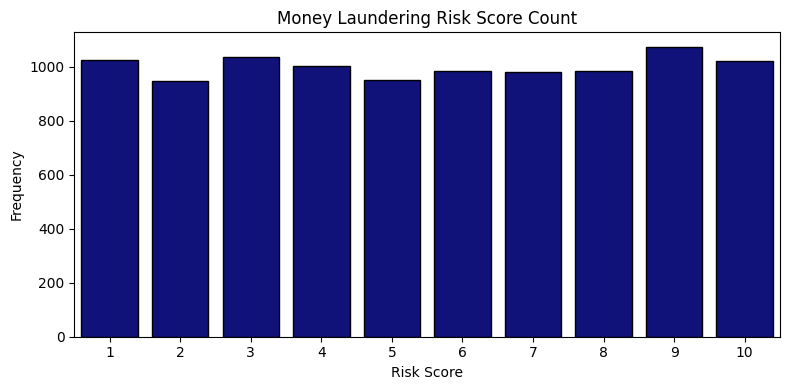

In [ ]:

plt.figure(figsize=(8, 4))
sns.countplot(x='Money Laundering Risk Score', data=data, color='darkblue', edgecolor='black')
plt.title("Money Laundering Risk Score Count")
plt.ylabel("Frequency")
plt.xlabel("Risk Score")
plt.tight_layout()
plt.show()

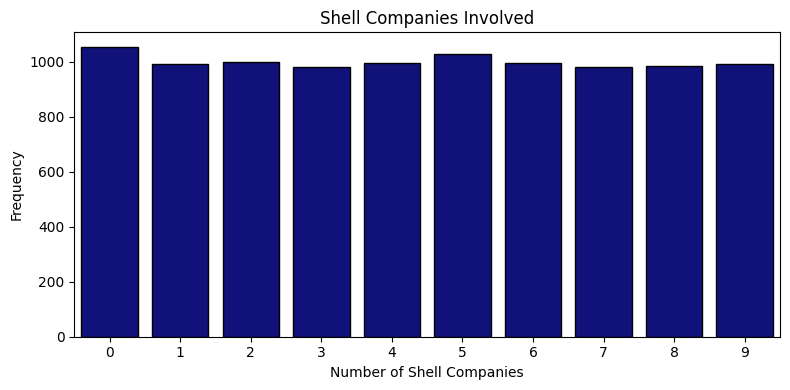

In [ ]:

plt.figure(figsize=(8, 4))
sns.countplot(x='Shell Companies Involved', data=data, color='darkblue', edgecolor='black')
plt.title("Shell Companies Involved")
plt.ylabel("Frequency")
plt.xlabel("Number of Shell Companies")
plt.tight_layout()
plt.show()

In [31]:
std_amount = data['Amount (USD)'].std()
print(f"Standard Deviation for Amount (USD): ${std_amount:,.2f}")

Standard Deviation for Amount (USD): $1,424,364.28


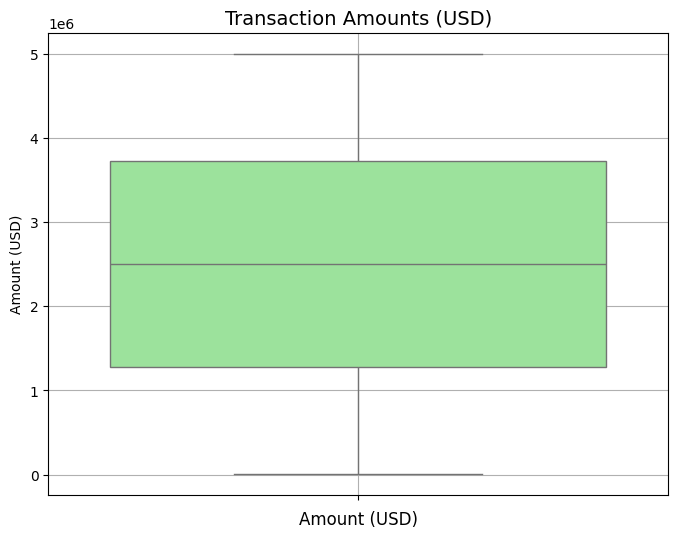

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Amount (USD)'], color='lightgreen')
plt.title('Transaction Amounts (USD)', fontsize=14)
plt.xlabel('Amount (USD)', fontsize=12)
plt.grid(True)
plt.show()

This box plot shows that the mid point for most transactions is $2.5million, most transactions cluster around $1.5m and $3.75m. There are no extreme outliers beyond $5m and there can't be a transaction which is less than $0. 

In [40]:
data.groupby('Industry')['Money Laundering Risk Score'].mean().sort_values()

Industry
Luxury Goods    5.373544
Oil & Gas       5.427843
Real Estate     5.455301
Casinos         5.556282
Arms Trade      5.570721
Construction    5.583562
Finance         5.711864
Name: Money Laundering Risk Score, dtype: float64

Bearing in mind the `Money Laundering Risk Score`range from 1-9 inclusive, there isn't a great deal of difference between the low and the highest score.

---

## Advanced Analysis 